In [0]:
#Section to import all the required libraries
from xclib.data import data_utils
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from math import sqrt
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

In [ ]:
root_path = "ass3_parta_data/"

In [0]:
#Section to read the files from the system
# f_train_x = sys.argv[1]
# f_train_y = sys.argv[2]
# f_test_x  = sys.argv[3]
# f_test_y  = sys.argv[4]
# f_val_x   = sys.argv[5]
# f_val_y   = sys.argv[6]

f_train_x = root_path+"train_x.txt"
f_train_y = root_path+"train_y.txt" 
f_test_x  = root_path+"test_x.txt"
f_test_y  = root_path+"test_y.txt"
f_val_x   = root_path+"valid_x.txt"
f_val_y   = root_path+"valid_y.txt"

In [0]:
def prepare_data(f_train_x,f_train_y,f_test_x,f_test_y,f_val_x,f_val_y):
    train_x = data_utils.read_sparse_file(f_train_x).todense()
    train_y = pd.read_csv(f_train_y, header=None)
    train_y = np.array(train_y).reshape(len(train_y),) 
    
    test_x = data_utils.read_sparse_file(f_test_x).todense()
    test_y = pd.read_csv(f_test_y, header=None)
    test_y = np.array(test_y).reshape(len(test_y),) 
    
    val_x = data_utils.read_sparse_file(f_val_x).todense()
    val_y = pd.read_csv(f_val_y, header=None)
    val_y = np.array(val_y).reshape(len(val_y),) 
    
    print('Shape of Trainig data :',train_x.shape,train_y.shape)
    print('Shape of Testing data :',test_x.shape,test_y.shape)
    print('Shape of Validation data :',val_x.shape,val_y.shape)
    
    return train_x,train_y,test_x,test_y,val_x,val_y


In [0]:
train_x,train_y,test_x,test_y,val_x,val_y = prepare_data(f_train_x,f_train_y,f_test_x,f_test_y,f_val_x,f_val_y)

/usr/local/lib/python3.6/dist-packages/xclib/data/data_utils.py:173: UserWarning: Header mis-match from inferred shape!
  warnings.warn("Header mis-match from inferred shape!")
/usr/local/lib/python3.6/dist-packages/xclib/data/data_utils.py:173: UserWarning: Header mis-match from inferred shape!
  warnings.warn("Header mis-match from inferred shape!")
/usr/local/lib/python3.6/dist-packages/xclib/data/data_utils.py:173: UserWarning: Header mis-match from inferred shape!
  warnings.warn("Header mis-match from inferred shape!")


Shape of Trainig data : (64713, 482) (64713,)
Shape of Testing data : (21571, 482) (21571,)
Shape of Validation data : (21572, 482) (21572,)


In [0]:
def fit_model(estimator,feature,sample_split,oob_score_val,que_part):

  if que_part == 'c':
    print('RF model parameters :-','n_estimators :',estimator,',max_features :',feature,',min_samples_split :',sample_split,',oob_score :',oob_score_val)
  
  if que_part == 'd':
    print('RF model parameters :-','n_estimators :',estimator,',max_features :',feature,',min_samples_split :',sample_split)
  clf = clf=RandomForestClassifier(n_estimators=estimator,max_features=feature,min_samples_split=sample_split,oob_score=oob_score_val)
  clf.fit(train_x,train_y)
  #Que_1_C
  if que_part == 'c':
    print('Accuracy on training set :',clf.score(train_x,train_y))
    print('Accuracy on testing set :',clf.score(test_x,test_y))
    print('Accuracy on validation set :',clf.score(val_x,val_y))
    print('Out of bag accuracy :',clf.oob_score_)
  #Que_1_D
  if que_part == 'd':
    return clf.score(test_x,test_y),clf.score(val_x,val_y)


In [0]:
def return_accuracy(estimator,feature,min_sam_splt):
  clf=RandomForestClassifier(n_estimators=estimator,max_features=feature,min_samples_split=min_sam_splt,n_jobs=-1,oob_score=True)
  clf.fit(train_x,train_y)
  test_accuracy = clf.score(test_x,test_y)
  val_accuracy = clf.score(val_x,val_y)
  return clf.oob_score_,test_accuracy,val_accuracy

In [0]:
def cal_best_parameters():
  list_accuracies = []
  n_estimators = [50,150,250,350,450]
  max_features = [0.1,0.3,0.5,0.7,0.9,1.0]
  min_samples_split = [2,4,6,8,10]
  max_accuracy = 0
  for estimator in tqdm(n_estimators):
    for feature in max_features:
      for min_sam_splt in min_samples_split:
        cur_accuracy,test_accuracy,val_accuracy = return_accuracy(estimator,feature,min_sam_splt)
        list_accuracies.append((estimator,feature,min_sam_splt,test_accuracy,val_accuracy))
        if cur_accuracy > max_accuracy:
            max_accuracy = cur_accuracy
            best_params = [estimator,feature,min_sam_splt]
  print('Best parameters are :',best_params)
  return best_params,list_accuracies

In [0]:
# def cal_best_parameters():
#   clf = RandomForestClassifier(oob_score=True)
#   parameters = {'n_estimators':[150,250], 'max_features':[0.1,0.3],'min_samples_split':[6,8,10]}
#   grid_obj = GridSearchCV(clf, parameters,cv=2, scoring='accuracy', refit=True)
#   t0 = time.time()
#   grid_fit = grid_obj.fit(train_x,train_y)
#   print('Time taken calculate the GridSearchCV :',(time.time()-t0)/60)
#   print('The best parameters are :',grid_fit.best_params_)
#   print('Best sscore :',grid_fit.best_score_)
#   return grid_fit.best_params_

In [0]:
def cal_accuracies():
  print('RF Model Accuracies with default parameters')
  fit_model(100,'auto',2,True,'c')
  #Best parameters are computer here
  print('Calcuation of best parameters starts here..')
  best_params,list_accuracies = cal_best_parameters()
  estimator,feature,sample_split = best_params[0],best_params[1],best_params[2]
  print('RF Model Accuracies with best parameters')
  fit_model(estimator,feature,sample_split,True,'c')
  
  return best_params,list_accuracies


In [0]:
#--------------- Part_C
best_params,list_accuracies = cal_accuracies()
#-----------Part_d
# plot_test_val(best_params[0],best_params[1],best_params[2])


RF Model Accuracies with default parameters
RF model parameters :- n_estimators : 100 ,max_features : auto ,min_samples_split : 2 ,oob_score : True
Accuracy on training set : 0.9126605164341013
Accuracy on testing set : 0.7969959668072876


  0%|          | 0/5 [00:00<?, ?it/s]

Accuracy on validation set : 0.7957537548674207
Out of bag accuracy : 0.8000556302443095
Calcuation of best parameters starts here..


100%|██████████| 5/5 [1:22:33<00:00, 990.60s/it] 


Best parameters are : [450, 0.1, 10]
RF Model Accuracies with best parameters
RF model parameters :- n_estimators : 450 ,max_features : 0.1 ,min_samples_split : 10 ,oob_score : True
Accuracy on training set : 0.8734102885046281
Accuracy on testing set : 0.8081220156691855
Accuracy on validation set : 0.8067865751900611
Out of bag accuracy : 0.8099609043005269


In [0]:
def plot_test_accuracy(title_text,X_label,Y_label,X_Axis,test_accuracies,val_accuracies):
  plt.plot(X_Axis, test_accuracies, color='g',label="Test Accuracy")
  plt.plot(X_Axis, val_accuracies, color='orange',label="Validation Accuracy")
  plt.scatter(X_Axis,test_accuracies)
  plt.scatter(X_Axis,val_accuracies)
  plt.xlabel(X_label)
  plt.ylabel(Y_label)
  plt.title(title_text)
  # plt.ylim(0.78,0.82)
  plt.xticks(X_Axis)
  plt.legend(loc='lower right')
  plt.show()


In [0]:
# ------------ Part d ----------
def plot_test_val(estimator,feature,sample_split):
  #n_estimators values vary
  test_accuracies1 = []
  val_accuracies1  = []
  test_accuracies2 = []
  val_accuracies2  = []
  test_accuracies3 = []
  val_accuracies3  = []
  n = len(list_accuracies)
  n_estimators = [50,150,250,350,450]
  max_features = [0.1,0.3,0.5,0.7,0.9,1.0]
  min_samples_split = [2,4,6,8,10]
  for i in range(n):
    if list_accuracies[i][1]==feature and list_accuracies[i][2]==sample_split and (list_accuracies[i][0] in n_estimators):
       test_accuracies1.append(np.round(list_accuracies[i][3],3))
       val_accuracies1.append(np.round(list_accuracies[i][4],3))
      #  print('Test Accuracy 1 :',list_accuracies[i][3]," Validation Accuracy 1 :",list_accuracies[i][4])

    if list_accuracies[i][0]==estimator and list_accuracies[i][2]==sample_split and (list_accuracies[i][1] in max_features):
       test_accuracies2.append(np.round(list_accuracies[i][3],3))
       val_accuracies2.append(np.round(list_accuracies[i][4],3))
      #  print('Test Accuracy 2 :',list_accuracies[i][3]," Validation Accuracy 2 :",list_accuracies[i][4])

    if list_accuracies[i][0]==estimator and list_accuracies[i][1]==feature and (list_accuracies[i][2] in min_samples_split):
       test_accuracies3.append(np.round(list_accuracies[i][3],3))
       val_accuracies3.append(np.round(list_accuracies[i][4],3))
      #  print('Test Accuracy 3 :',list_accuracies[i][3]," Validation Accuracy 3 :",list_accuracies[i][4])
    
  #plot data
  print('max_features and min_samples_split are fixed n_estimators varies for [50,150,250,350,450]')
  print('Test Data Accuracy :',test_accuracies1)
  print('Validation Data Accuracy :',val_accuracies1)
  plot_test_accuracy('max_features and min_samples_split fixed','value of n_estimators','Accuracy',n_estimators,test_accuracies1,val_accuracies1)
  print('n_estimators and min_samples_split are fixed max_features varies for [0.1,0.3,0.5,0.7,0.9,1.0]')
  print('Test Data Accuracy :',test_accuracies2)
  print('Validation Data Accuracy :',val_accuracies2)
  plot_test_accuracy('n_estimators and min_samples_split fixed','value of max_features','Accuracy',max_features,test_accuracies2,val_accuracies2)
  print('n_estimators and max_features are fixed min_samples_split varies for [2,4,6,8,10]')
  print('Test Data Accuracy :',test_accuracies3)
  print('Validation Data Accuracy :',val_accuracies3)
  plot_test_accuracy('n_estimators and max_features fixed','value of min_samples_split','Accuracy',min_samples_split,test_accuracies3,val_accuracies3)



max_features and min_samples_split are fixed n_estimators varies for [50,150,250,350,450]
Test Data Accuracy : [0.807, 0.808, 0.809, 0.808, 0.808]
Validation Data Accuracy : [0.804, 0.806, 0.807, 0.807, 0.807]


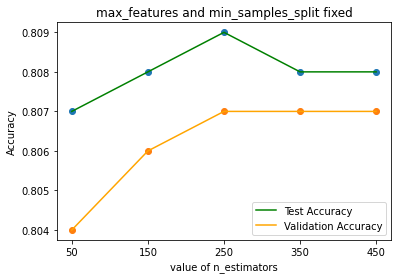

n_estimators and min_samples_split are fixed max_features varies for [0.1,0.3,0.5,0.7,0.9,1.0]
Test Data Accuracy : [0.808, 0.809, 0.807, 0.807, 0.805, 0.805]
Validation Data Accuracy : [0.807, 0.807, 0.806, 0.806, 0.805, 0.804]


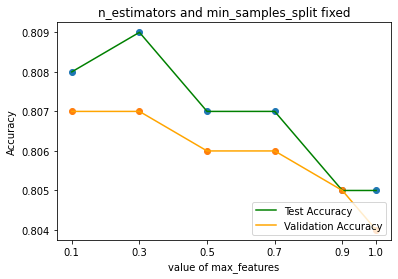

n_estimators and max_features are fixed min_samples_split varies for [2,4,6,8,10]
Test Data Accuracy : [0.799, 0.804, 0.806, 0.807, 0.808]
Validation Data Accuracy : [0.797, 0.801, 0.804, 0.805, 0.807]


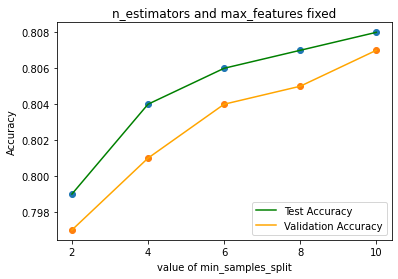

In [43]:
plot_test_val(best_params[0],best_params[1],best_params[2])